In [269]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from collections import Counter
pd.set_option('display.max_columns',None)

In [4]:
data = pd.read_csv('/NFS_SQUAD_HISTO/OCI_DATA/02_intermediate/preprocessed_oss_counter_all_v3_new.csv',delimiter ='|')
data = data.sort_values(by=['week_period'])
data = data.drop('Unnamed: 0', axis =1)
duplicated = data[data.duplicated(subset=['cell_name','date'])]\
            .sort_values(by=['date','cell_name'])
data = data.drop(duplicated.index)

### cells with \_s\_ in the name : 

In [5]:
def s_ran(name):
    return '_S_' in name
        
data[data['cell_name'].apply(s_ran)].cell_name.unique()

array(['OCI2594_S_DIVO_GODILE_L26-2', 'OCI2594_S_DIVO_GODILE_L26-3',
       'OCI2594_S_DIVO_GODILE_L26-1', 'OCI2691_S_CITE_ADO_L26-2',
       'OCI2691_S_CITE_ADO_L26-3', 'OCI2691_S_CITE_ADO_L26-1',
       'OCI1375_S_KATIOLA_CIT_L26-1', 'OCI1375_S_KATIOLA_CIT_L26-2',
       'OCI1375_S_KATIOLA_CIT_L26-3'], dtype=object)

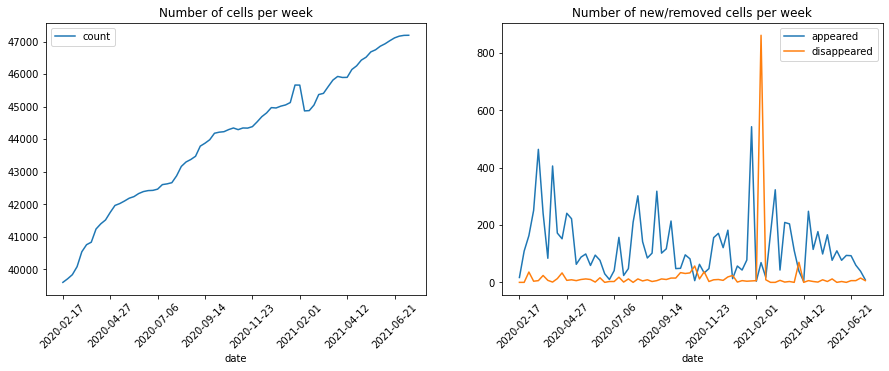

In [15]:
cells_list = data.groupby(['date']).cell_name.apply(set)
prev = cells_list[0]
appeared = []
disappeared = []
LA = []
LD = []
count=[]
# remove 0 because it does not have a previous and -1 because we do not have enough data
for date,cells in cells_list[1:-1].items():
    appeared += [len(list(cells-prev))]
    disappeared += [len(list(prev-cells))]
    LA += [list(cells-prev)]
    LD += [list(prev-cells)]
    count += [len(cells) ]
    prev = cells
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].set_title('Number of cells per week')
axs[1].set_title('Number of new/removed cells per week')
pd.DataFrame({'count':count},cells_list[1:-1].keys()).plot(ax=axs[0])
pd.DataFrame({'appeared':appeared,'disappeared':disappeared},cells_list[1:-1].keys()).plot(ax=axs[1])
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

In [142]:
df_cells_changes = pd.DataFrame({'appeared':LA,'disappeared':LD,
                  'number_appeared':appeared,'number_disappeared':disappeared},index=cells_list[1:-1].keys())
date_max_appeared = df.sort_values('number_appeared').index[-1]
date_max_disappeared = df.sort_values('number_disappeared').index[-1]
df_max_appeared = data[data.date == date_max_appeared]
df_max_disappeared = data[data.date == date_max_disappeared]
list_max_appeared = df_cells_changes.loc[date_max_appeared].appeared
list_max_disappeared = df_cells_changes.loc[date_max_disappeared].disappeared
site_max_appeared = [cell[0:7] for cell in list_max_appeared]
site_max_disappeared = [cell[0:7] for cell in list_max_disappeared]


<AxesSubplot:xlabel='site'>

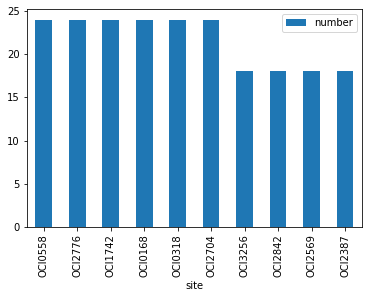

In [148]:
count = {k: v for k,v in sorted(dict(Counter(site_max_appeared)).items(), key=lambda item : item[1], reverse = True)}
pd.DataFrame({'site' : list(count.keys()), 'number': list(count.values())})[:10].plot(x='site',kind='bar')

In [175]:
data[(data.site_id=='OCI3256') & (data.date == date_max_appeared)].sort_values('cell_name')

,index,cell_name,date,cell_band,cell_tech,cell_sector,year,week,week_period,site_id,total_data_traffic_dl_gb,total_voice_traffic_kerlands,average_throughput_user_dl_kbps,average_throughput_user_ul_kbps,cell_occupation_dl_percentage,average_number_of_users_dl,average_number_of_users_ul,cell_occupation_ul_percentage,total_data_traffic_ul_gb,lost_traffic_kerlands,traffic_loss_rate,average_number_of_users_in_queue
1175348,1175348,OCI3256_NDOUCI_HG_G18-1,2021-01-25,G18,2G,1,2021,4,202104,OCI3256,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1175373,1175373,OCI3256_NDOUCI_HG_G18-2,2021-01-25,G18,2G,2,2021,4,202104,OCI3256,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1175398,1175398,OCI3256_NDOUCI_HG_G18-3,2021-01-25,G18,2G,3,2021,4,202104,OCI3256,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1175423,1175423,OCI3256_NDOUCI_HG_G9-1,2021-01-25,G9,2G,1,2021,4,202104,OCI3256,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1175448,1175448,OCI3256_NDOUCI_HG_G9-2,2021-01-25,G9,2G,2,2021,4,202104,OCI3256,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1175473,1175473,OCI3256_NDOUCI_HG_G9-3,2021-01-25,G9,2G,3,2021,4,202104,OCI3256,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1175525,1175525,OCI3256_NDOUCI_HG_U21-11,2021-01-25,U21,3G,1,2021,4,202104,OCI3256,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1175551,1175551,OCI3256_NDOUCI_HG_U21-12,2021-01-25,U21,3G,1,2021,4,202104,OCI3256,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1175577,1175577,OCI3256_NDOUCI_HG_U21-13,2021-01-25,U21,3G,1,2021,4,202104,OCI3256,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1175603,1175603,OCI3256_NDOUCI_HG_U21-21,2021-01-25,U21,3G,2,2021,4,202104,OCI3256,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN


<AxesSubplot:xlabel='site'>

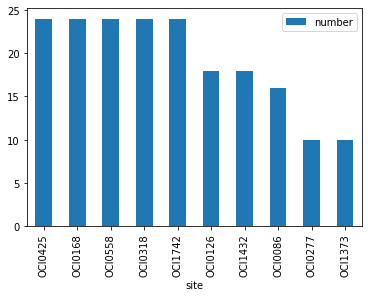

In [176]:
count = {k: v for k,v in sorted(dict(Counter(site_max_disappeared)).items(), key=lambda item : item[1], reverse = True)}
pd.DataFrame({'site' : list(count.keys()), 'number': list(count.values())})[:10].plot(x='site',kind='bar')

In [186]:
len(list_max_disappeared),len(list_max_appeared),len(set(list_max_disappeared+list_max_appeared))

(862, 543, 1405)

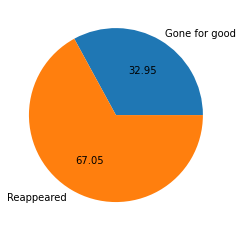

In [258]:
df_after_distinction = df_cells_changes.loc[date_max_disappeared:].iloc[1:]
list_reappeared = set([cell for array in  df_after_distinction.appeared for cell in array ])
reappearnce_number = 0
for cell in list_max_disappeared :
    if cell in list_reappeared:
        reappearnce_number+=1
plt.pie([len(list_max_disappeared)-reappearnce_number,reappearnce_number],labels=['Gone for good','Reappeared'],
       autopct='%.2f')
plt.show()

In [257]:
def correct_name(cell):
    return cell.replace("_dismantled",'')
data['processed_cell_name']=data.cell_name.apply(correct_name)
data[data.duplicated(subset=['processed_cell_name','date'],keep=False)].sort_values(['date','cell_name'])

,index,cell_name,date,cell_band,cell_tech,cell_sector,year,week,week_period,site_id,total_data_traffic_dl_gb,total_voice_traffic_kerlands,average_throughput_user_dl_kbps,average_throughput_user_ul_kbps,cell_occupation_dl_percentage,average_number_of_users_dl,average_number_of_users_ul,cell_occupation_ul_percentage,total_data_traffic_ul_gb,lost_traffic_kerlands,traffic_loss_rate,average_number_of_users_in_queue,processed_cell_name
1316716,141225,OCI0168_BARADJI_G18-1,2021-01-25,G18,2G,1,2021,4,202104,OCI0168,0.861000,1026.34,37.60,20.99,11.08,NaN,NaN,NaN,0.000000,0.0,0.0,NaN,OCI0168_BARADJI_G18-1
71339,71339,OCI0168_BARADJI_G18-1_dismantled,2021-01-25,G18,2G,1,2021,4,202104,OCI0168,0.861000,1026.34,37.60,20.99,11.08,NaN,NaN,NaN,0.000000,0.0,0.0,NaN,OCI0168_BARADJI_G18-1
1316768,141277,OCI0168_BARADJI_G18-2,2021-01-25,G18,2G,2,2021,4,202104,OCI0168,0.264000,702.75,41.12,22.96,15.04,NaN,NaN,NaN,0.000000,0.0,0.0,NaN,OCI0168_BARADJI_G18-2
71364,71364,OCI0168_BARADJI_G18-2_dismantled,2021-01-25,G18,2G,2,2021,4,202104,OCI0168,0.264000,702.75,41.12,22.96,15.04,NaN,NaN,NaN,0.000000,0.0,0.0,NaN,OCI0168_BARADJI_G18-2
1316820,141329,OCI0168_BARADJI_G18-3,2021-01-25,G18,2G,3,2021,4,202104,OCI0168,1.983000,1255.45,47.32,25.65,13.97,NaN,NaN,NaN,0.000000,0.0,0.0,NaN,OCI0168_BARADJI_G18-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678473,678473,OCI1742_PALMERAIE_MOBILE_L8-1_dismantled,2021-02-01,L8,4G,1,2021,5,202105,OCI1742,351.917877,0.00,5188.31,1094.55,54.51,19.78,NaN,25.46,56.165621,0.0,NaN,1.49,OCI1742_PALMERAIE_MOBILE_L8-1
2489035,1332985,OCI1742_PALMERAIE_MOBILE_L8-2,2021-02-01,L8,4G,2,2021,5,202105,OCI1742,197.771751,0.00,6763.57,1732.47,38.65,9.57,NaN,17.21,34.687110,0.0,NaN,0.61,OCI1742_PALMERAIE_MOBILE_L8-2
678490,678490,OCI1742_PALMERAIE_MOBILE_L8-2_dismantled,2021-02-01,L8,4G,2,2021,5,202105,OCI1742,197.771751,0.00,6763.57,1732.47,38.65,9.57,NaN,17.21,34.687110,0.0,NaN,0.61,OCI1742_PALMERAIE_MOBILE_L8-2
2489087,1333037,OCI1742_PALMERAIE_MOBILE_L8-3,2021-02-01,L8,4G,3,2021,5,202105,OCI1742,99.320123,0.00,6253.25,1302.20,27.96,5.74,NaN,14.90,18.117722,0.0,NaN,0.33,OCI1742_PALMERAIE_MOBILE_L8-3


In [259]:
data.drop(['index','cell_sector','year','week','week_period'],axis=1).describe()

,total_data_traffic_dl_gb,total_voice_traffic_kerlands,average_throughput_user_dl_kbps,average_throughput_user_ul_kbps,cell_occupation_dl_percentage,average_number_of_users_dl,average_number_of_users_ul,cell_occupation_ul_percentage,total_data_traffic_ul_gb,lost_traffic_kerlands,traffic_loss_rate,average_number_of_users_in_queue
count,3.322509e+06,3.322509e+06,3.252528e+06,3.251986e+06,3.273062e+06,632565.000000,90088.000000,541837.000000,3.322509e+06,3.322509e+06,2.679165e+06,2.241263e+06
mean,8.800969e+01,4.646820e+02,3.585990e+03,4.980878e+02,5.702039e+01,20.203110,3.349085,18.768935,7.890544e+00,1.008013e+01,-2.249489e-02,1.506906e+00
std,2.002497e+02,6.663461e+02,5.557432e+03,9.687687e+02,3.345204e+01,24.679885,3.770635,9.324446,2.684173e+01,1.182254e+03,2.576910e+01,2.108594e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,10.000000,0.000000e+00,-1.442536e+06,-3.665911e+04,0.000000e+00
25%,1.482000e+00,2.804000e+01,4.479000e+01,2.302000e+01,2.207000e+01,3.000000,1.000000,12.030000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,2.195000e+01,2.366200e+02,2.277950e+03,2.360000e+02,6.757000e+01,11.160000,2.000000,15.460000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,8.002000e+01,6.193200e+02,3.940080e+03,3.410000e+02,9.012000e+01,28.270000,5.000000,22.350000,0.000000e+00,0.000000e+00,0.000000e+00,1.030000e+00
max,4.478728e+03,1.424068e+04,2.415333e+06,4.827934e+04,9.670000e+01,404.370000,65.000000,90.240000,4.870654e+02,5.675794e+03,5.085477e+00,8.604000e+01


<AxesSubplot:>

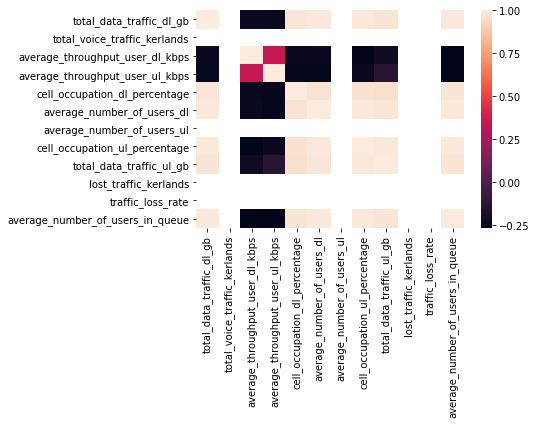

In [276]:
sn.heatmap(data[data.cell_name == 'OCI2125_SEIZRA_BONON_L8-2'].drop(
           ['index','cell_sector','year','week','week_period'],axis=1).corr())
